Kaggle Dataset Link: https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [4]:
#Profile on Kaggle -> Settings -> API -> Create New Token -> Upload on CoLab Directory
!mkdir -p ~/.kaggle #creating new 'kaggle' parent directory
!cp kaggle.json ~/.kaggle/ #copying 'kaggle.json' file from current to 'kaggle' directory

In [5]:
#Kaggle Dataset page -> right-top three vertical dots -> Copy API command
!kaggle datasets download -d salader/dogs-vs-cats #downloading dataset

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.8MB/s]


In [8]:
#extracting zip folder to get 'train' and 'test' sub-folders
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf #importing TensorFlow library
from tensorflow import keras #importing Keras API
from keras import Sequential #importing Sequential class
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout #importing CNN layers

In [10]:
#generators for training and testing data

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#Normalization

def process (image,label):
  image = tf.cast(image/255,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
#creating Convolutional Neural Network Model

model = Sequential() #creating a model

#adding first convolutional, batch normalization and max pooling layers with 32 feature maps
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#adding first convolutional, batch normalization and max pooling layers with 64 feature maps
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#adding first convolutional, batch normalization and max pooling layers with 128 feature maps
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#converting 2D feature maps to 1D as an i/p for next dense layers
model.add(Flatten())

model.add(Dense(128,activation='relu')) #adding fully connected layers with 128 neurons
model.add(Dropout(0.1)) #preventing overfitting by dropping 10% training data of previous layer
model.add(Dense(64,activation='relu')) #adding fully connected layers with 128 neurons
model.add(Dropout(0.1)) #preventing overfitting by dropping 10% training data of previous layer

#output layer with single neuron for binary classification
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#summarizing the created CNN model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
#compiling the model with 'adam' (Adaptive Moment Estimation) optimizer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
#training the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 103ms/step - accuracy: 0.5384 - loss: 2.6611 - val_accuracy: 0.6114 - val_loss: 0.6531
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 81ms/step - accuracy: 0.5662 - loss: 0.6774 - val_accuracy: 0.5548 - val_loss: 0.6612
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.5971 - loss: 0.6438 - val_accuracy: 0.6080 - val_loss: 0.7863
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6771 - loss: 0.5686 - val_accuracy: 0.6704 - val_loss: 0.5676
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7336 - loss: 0.4925 - val_accuracy: 0.7430 - val_loss: 0.5114
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7834 - loss: 0.4359 - val_accuracy: 0.7272 - val_loss: 0.5049
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.8164 - loss: 0.3772 - val_accuracy: 0.7316 - val_loss: 0.6116
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8386 - loss: 0.3355 -

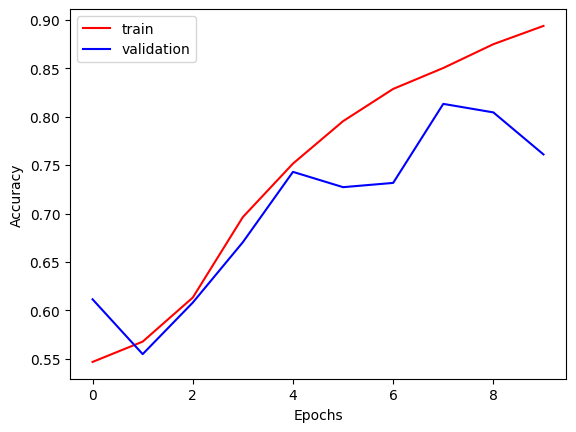

In [17]:
#plotting training and testing accuracies w.r.t epochs

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

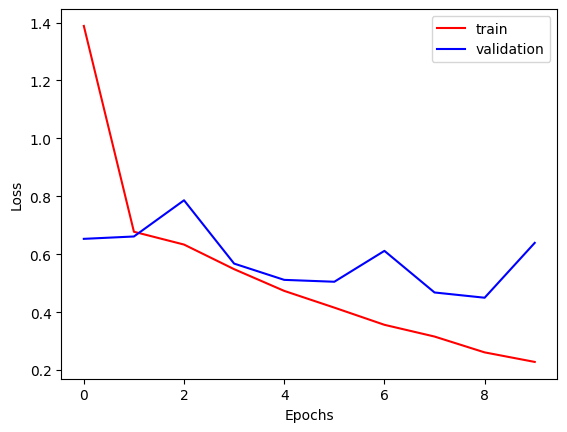

In [18]:
#plotting training and testing loss w.r.t epochs

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

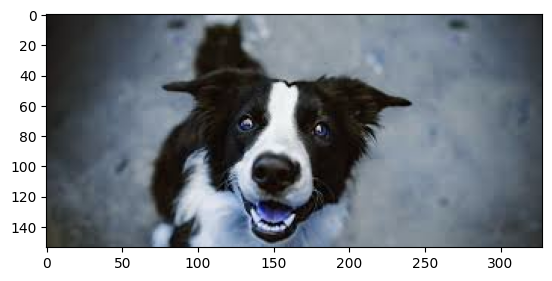

In [38]:
import cv2 #importing OpenCV library - Classified as '1'

#predicting o/p with unseen dog image
test_dog_img = cv2.imread('/content/dog_image.jpg')
plt.imshow(test_dog_img)
test_dog_img.shape

test_dog_img = cv2.resize(test_dog_img,(256,256))
test_input1 = test_dog_img.reshape(1,256,256,3)
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)

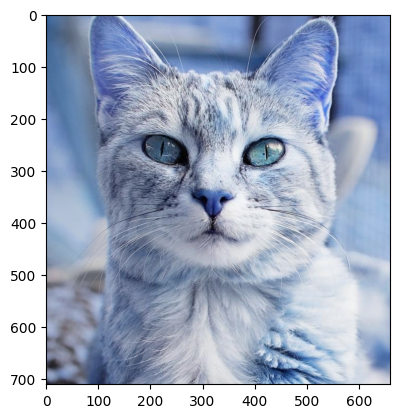

In [39]:
#predicting o/p with unseen cat image - Classified as '0'
test_cat_img = cv2.imread('/content/cat_image.jpg')
plt.imshow(test_cat_img)
test_cat_img.shape

test_cat_img = cv2.resize(test_cat_img,(256,256))
test_input2 = test_cat_img.reshape(1,256,256,3)
model.predict(test_input2)